1.
MAP is basically a metric used to measure performance of the object detection models like RCNN,FAST-RCNN..etc.
To calculate MAP we have to use IOU(Intersection Over Union)by setting an threshold.if IOU >0.5,it detects well.

2.

RCNN
a)it uses Selective search algorithm.
b)extract 2k region proposals.
It uses SVM to classify the object
c)It takes 46 seconds to detect the object
d)It uses Multistage network
e)Time consuming

Fast-RCNN
a)Instaed of using SVM,it uses normal classification model
b)Uses ROI Pooling
c)takes 2 sec to detect object

Faster -RCNN

1)Remove Selective search algorithm
2)Included RPN
3)Faster than fast RCNN to detect object

3.


RCNN,Fast Rcnn runs on CPU,but RPN runs on GPU so that its computational task is very fast.
It reduces the proposal time
It improves the feature representation by sharing the layers.


4.

In yolo we have an input image of size 448X448X3
This will passed to the Googlenet then we get14X14X1024.
Here we have different convolutional layers and finally weget 7X7X30 image.
dividde theimage into 7X7X30 grid,where each grid is responsible for producing 2 bounding box.
The 1st anchor box we have 5 outputs
x,y,w,h,probability
similarly for 2nd anchor box we have 5 output,
remaing 20 represents conditinal probability.
Then find the class score by using conidence score X propability of class value
Then use non max supression to remove duplicate bounding boxes using IOU.

8.

IOU is measures how well the predicted box is align with the ground truth box.
To calculate MAP,we should use IOU by setting threshold eg 0.5.
IOU is basically ratio between Area of intersecction to the area of Union.

9.

Non-max supression is used to eliminate the redundant bounding box.When the same object is dects multiple time in different bounding box,we use NMS to remove duplicate boxes and selects appropriate bounding box.

7.

In faster RcNN and yolo, anchor boxes used to create regions and predict bounding box adjastment.These predictions help refine the anchor boxes to match the ground-truth object locations.





In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset_directory = '/content/drive/MyDrive/Celebrity Faces Dataset'

Loaded images shape: (1799, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (1799,) /n Images with Folder name


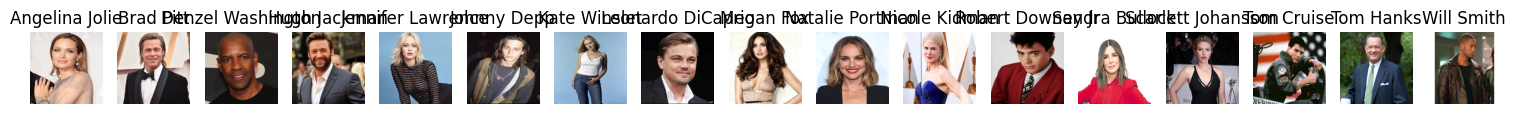

In [4]:
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt


In [6]:
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [7]:
learning_rate = 0.001
batch_size = 32
epochs = 20

# Load and preprocess the dataset (example)
# Replace with actual loading and preprocessing steps
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Example input shape (to be adjusted based on dataset)
input_shape = train_images.shape[1:]
num_classes = len(set(train_labels.flatten()))

# Create the model
model = create_model(input_shape, num_classes)
model.summary()

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

170498071/170498071 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                       

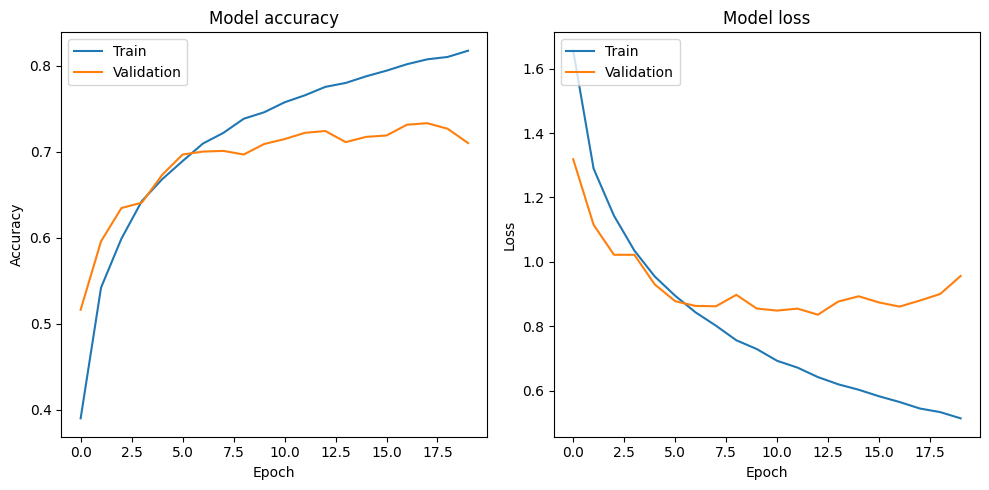

In [8]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
